# KNN Classwork
## st121411

In [106]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold

In [107]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=0,cluster_std=1.0)

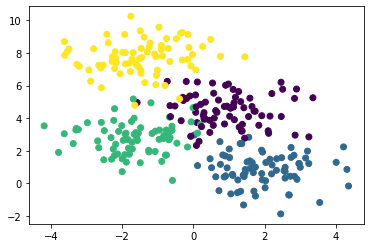

In [108]:
ax = plt.axes()
ax.scatter(X[:,0],X[:,1],c=y)

In [109]:
#implementation

#1. prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#2. function for calculating pariwise distance
def distance(x,X):
    d = np.sqrt(np.sum((X-x)**2,axis=1))
    return d

def knearest(k,distance,y):
    indices = np.argsort(distance)
    nearest_labels = y[indices[:k]]
    mode = stats.mode(nearest_labels)
    return mode[0]

#3. sort distance matrix

#4. get majority class



From the gridsearch it seems that k = 8 and k = 17 are the best predictors


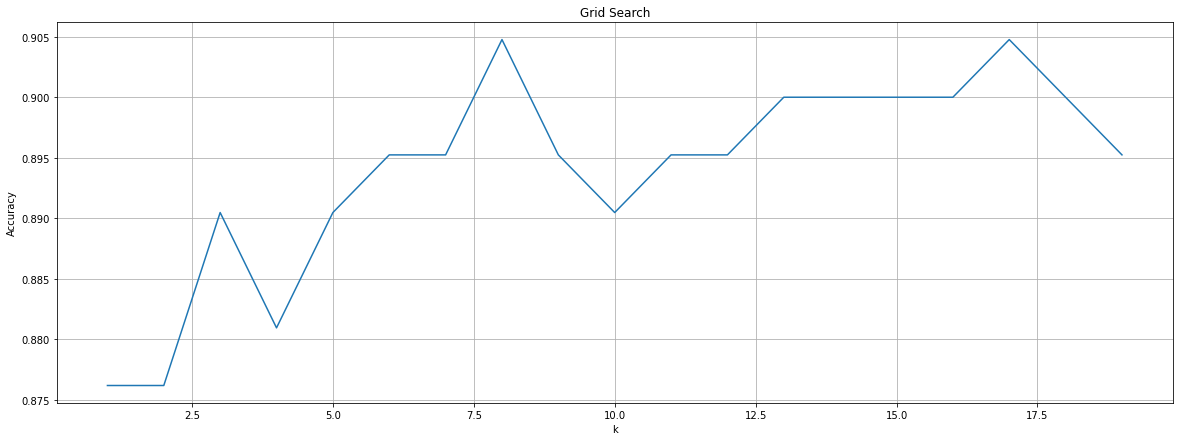

In [110]:
kf = KFold(n_splits=5,shuffle=True,random_state=2)

k_accuracy = []
for k in range(1,20):
    accuracy = []
    for train_index, test_index in kf.split(X_train):
        X_train_val, X_test_val = X_train[train_index], X_train[test_index]
        y_train_val, y_test_val = y_train[train_index], y_train[test_index]
        prediction = []
        for i in range(X_test_val.shape[0]):
            dis = distance(X_test_val[i],X_train_val)
            prediction.append(knearest(k,dis,y_train_val)[0])
        prediction = np.array(prediction)
        accuracy.append(np.sum(prediction == y_test_val)/y_test_val.size)  
    accuracy = np.array(accuracy)
    k_accuracy.append(accuracy)
k_accuracy = np.array(k_accuracy)

plt.figure(figsize=(20,7))
plt.plot(np.arange(1,20),np.mean(k_accuracy,axis=1))
plt.title("Grid Search")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.grid(True)
#print(k_accuracy)

print("From the gridsearch it seems that k = 8 and k = 17 are the best predictors")

In [118]:
from sklearn.metrics import classification_report

prediction  = []
for i in range(X_test.shape[0]):
    dis = distance(X_test[i],X_train)
    prediction.append(knearest(8,dis,y_train)[0])
prediction = np.array(prediction)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        22
           2       0.96      1.00      0.98        25
           3       1.00      1.00      1.00        22

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90

